## Make some codes
How to create your own markers

In [1]:
%pylab
%matplotlib inline
import os
import matplotlib.image as mpimg
from matplotlib.patches import Rectangle
from matplotlib.backends.backend_pdf import PdfPages

import sys
sys.path += ['..']
import qrdar

Using matplotlib backend: Qt4Agg
Populating the interactive namespace from numpy and matplotlib


In [2]:
# This uses the AruCo 16h3 dictionary stored within the module...
code_stack = qrdar.common.load_codes('aruco_mip_16h3')
# ...but to make your own you would need an m x m x n matrix

In [3]:
# some text you would like printed on the back
mytext = 'any questions please contact p.wilkes@ucl.ac.uk'

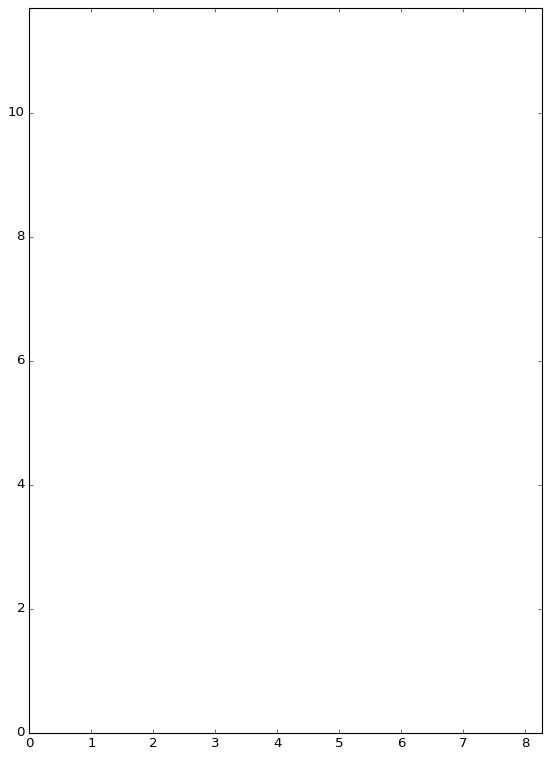

In [7]:
pp = PdfPages('aruco_tags_16h3_000-249.pdf')
fig, ax = plt.subplots(figsize=(8.27, 11.69), facecolor='white')
plt.style.use('classic')
X = 5.3

for i in np.arange(250):
    
    # plot code
    ax.imshow(code_stack[:, :, i], 
              extent=[0.15, 8.12, 2.5, 2.5 + 8.02],
              cmap=plt.cm.Greys_r,
              interpolation='Nearest')
    
    # plot marker stickers (20 mm - radius in inches)
    for circle in [(.55, .5), (8.27 - .55, 2), (.55, 11.69 - .7), (8.27 - 2.55, 11.69 - .7)]:
        CIRCLE = plt.Circle(circle, radius=0.39, facecolor='white', edgecolor='k')
        ax.add_artist(CIRCLE)

    # add marker number
    ax.text((8.27 / 2.), .25, '{:03d}'.format(i), fontsize=160, ha='center', weight='heavy', color='k', clip_on=True)
    
    # add corner crosses for print alignment
    for x in [(0, 0), (0, 11.69), (8.27, 11.69), (8.27, 0)]:
        plt.scatter(*x, marker='+', color='k')
    
    # tidy things up
    ax.set_xlim(0, 8.27)
    ax.set_ylim(0, 11.69)
    ax.set_xticks([])
    ax.set_yticks([])
    plt.axis('off')
    
    # print front to pdf
    plt.savefig(pp, format='pdf', papertype='A4', bbox_inches='tight', pad_inches=0, dpi=300)
    plt.cla() # then clear axis

    # add code in reverse on back of target
    ax.imshow(np.fliplr(code_stack[:, :, i]), 
              extent=[0.15, 8.12, 2.5, 2.5 + 8.02],
              cmap=plt.cm.Greys_r,
              interpolation='Nearest')

    # blackout number
    rec = Rectangle((1.24, .2), 5.79, 2.2, fc='k', ec='none')
    ax.add_patch(rec)
    
    # add some text
    txt =  mytext + '\ncode $\copyright$ AruCo'
    ax.text((8.27 / 2.), 10.8, txt, fontsize=10, ha='center', weight='heavy', color='k')
    
    # add corner crosses for print alignment
    for x in [(0, 0), (0, 11.69), (8.27, 11.69), (8.27, 0)]:
        plt.scatter(*x, marker='+', color='k')

    # tidy things up
    ax.set_xlim(0, 8.27)
    ax.set_ylim(0, 11.69)
    ax.set_xticks([])
    ax.set_yticks([])
    plt.axis('off')
    
    # print back to pdf
    plt.savefig(pp, format='pdf', papertype='A4', bbox_inches='tight', pad_inches=0)
    plt.cla()
    
#     if i == 0: break
    
pp.close()